# Lecture 7: MCMC

AM207: Pavlos Protopapas, Harvard University

Feb 18 2014

------

# A little history 

In 1946, Stan Ulam while recovering from an illness was playing solitaire
and he was trying to find the 'perfect' game by computing
 the chances that a particular solitaire laid out with 52 cards
would come out successfully. He attempted combinatorial
calculations but eventually he decided to lay out several solitaires
at random and observe the number of successful plays. This idea of
selecting a statistical sample to approximate a hard combinatorial problem by a much
simpler problem is at the heart of modern Monte Carlo simulation.




Ulam realized that computers could be used  to answer questions 
of many physics problems (in particular neutron diffusion). 
With the help of John Von Neumann in the next few years 
developed many Monte Carlo algorithms, including importance sampling and
rejection sampling. [Enrico Fermi in the 1930s also used Monte Carlo in the calculation of
neutron diffusion, and later designed the FERMIAC, a Monte Carlo mechanical device that
performed calculations]. In the 1940s Nick Metropolis was fascinated with Monte Carlo methods 
and designed new controls for the state-of-the-art computer (ENIAC) with Klari Von Neumann,
John's wife. He also designed an improved computer, which he named the MANIAC in the hope that
computer scientists would stop using acronyms.
This computing machines became popular amongst many mathematicians and physicists (Fermi, Von Neumann, Ulam, Teller, Richtmyer, Bethe, Feynman, and Gamow) that 
 would go ask him to help them with their problems. 
 In 1949, he published the first public document on Monte Carlo simulation with
Stan Ulam (Metropolis and Ulam, 1949).  This paper introduced, among other ideas, Monte
Carlo particle methods which we will see in later lectures. 
He proposed the Metropolis algorithm with the Tellers
and the Rosenbluths (Metropolis et al., 1953).

Metropolis algorithm is among the top ten most used algorithms  in 
science and engineering in the last twenty years. 
Metropolis algorithm is one of the algorithms in a large class
of stochastic algorithms known as Markov chain Monte Carlo (MCMC). 
These algorithms are often used  in statistics, econometrics, physics and computing science, etc
and have proven to make significant contribution to many scientific fields. 
Especially in high-dimensional problems, such as computing the volume
of a convex body in d-dimensions, for which MCMC simulation is the only known general
approach for providing a solution within a reasonable time (polynomial in d). 


The most significant paper after this was the generalization of
the Metropolis algorithm by Hastings in 1970. Hastings and his student Peskun showed that
Metropolis and the more general Metropolis-Hastings algorithms are particular instances
of a large family of algorithms. 
They studied the optimality of these algorithms and introduced the
formulation of the Metropolis-Hastings algorithm that we look in these lectures. 

There are a few MCMC publications in the statistics literature but it is not 
until 1990 that MCMC made the first impact in statistics (Gelfand & Smith, 1990). 

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
import seaborn as sns

C:\Users\vkaynig\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Introduction
We are all used to using functions. In the last lectures instead of just using the posterior pdf, which is a function that we can use all the nice tools you know from calculus you learned in kindergarten, I, all of sudden started returned 'random' numbers at you. Why we are returned thousands of samples from the posterior as a solution, which at first is confusing. 

We also learned how to generate samples from posteriors (or priors) with the rejection method and that is what we used so far (lectures and homework). We also know that importance sampling is better but to use that we need to know the normalization. The wish is to do importance sampling without having to know the normalization, and that is what MCMC is all about. 

Problems that are intractable using
analytic approaches often become possible to solve using some form of MCMC, even with
high-dimensional problems. The development of MCMC is arguably the biggest advance in
the computational approach to statistics. While MCMC is very much an active research
area, there are now some standardized techniques that are widely used. We
will discuss many forms of MCMC: Metropolis-Hastings, Gibbs sampling, slice sampling, Hamiltonian MCMC and few others. Before we go
into these techniques though, we ﬁrst need to understand the two main ideas underlying
MCMC: Monte Carlo integration (we have done this), and Markov chains









### Motivation
MCMC techniques are applied to solve integration and optimization problems in
large dimensional spaces. These two types of problem play a fundamental role in machine
learning, physics, statistics, econometrics and decision analysis.  For example

* Bayesian inference and learning
* Optimization
* Statistical mechanics

### MCMC Algorithm

MCMC is a strategy for generating samples $x^{(i)}$  using a Markov chain mechanism. 
This mechanism is constructed so that the chain spends more
time in the most important regions. In particular, it is constructed so that the samples $x^{(i)}$ 
mimic samples drawn from the target distribution $p(x)$. 
We should emphasize  that we use MCMC when we cannot draw samples from $p(x)$ directly, but can evaluate $p(x)$ up to a normalization constant.



# Markov Chains
For simplicity we should introduce Markov chains on finite state space, where $x^{(i)}$ can only take 
discrete values $x^{(i)}  =\left\{x_1^{i},x_2^{i}, \ldots, x_s^i \right\}$. This __stochastic process__ is called
Markov chain if we transition from one state to another state
using a simple sequential procedure. We start a Markov chain at some state $x^{1}$, and use
a transition function $T(x^{(i)} | x^{(i-1)})$, to determine the next state, $x^{(2)}$
conditional on the last state. We then keep iterating to create a sequence of states:

$$ x^{(1)} \rightarrow x^{(2)} \rightarrow \ldots \rightarrow x^{(i)} \rightarrow \ldots $$ 

Each such a sequence of states is called a Markov chain or simply chain. The procedure
for generating a sequence of T states from a Markov chain is the following:

* Set $i=1$
* Generate a initial value $u$, and set $x^{(1)} = u$
* Repeat 

	1. $i=i+1$
	2. Sample a new value u from the transition function $T(x^{i}| x^{(i-1)})$
	3. Set  $x^{(i)} = u$

	4. Until $i=T$


Importantly, in this iterative procedure, the next state of the chain at $i + 1$ is based only
on the previous state at $i$. Therefore, each Markov chain wanders around the state space and
the transition to a new state is only dependent on the last state. It is this local dependency
what makes this procedure __Markov__ or __memoryless__. This is an important
property when using Markov chains for MCMC. Formally
 
$$ p(x^{(i)} | x^{(i-1)}\ldots x^{(1)}) = T(x^{i}| x^{(i-1)})$$


The chain is called __homogenous__ if $T(x^{i}|x^{(i-1)})$ remains unchanged for 
all $i$. In other words the evolution of the chain depends only on the current state of the chain 
and a invariant transition matrix. 

As an example consider a life insurance company that wants to find out how much money to charge its clients. 
The company wants to estimate how long the clients will live. It proposes the following model summarizing the state of health of an individual on a monthly basis: healthy, sick and dead with transition graph shown in figure below 



![markov example](./Lecture06_07_data/Markov_ex1.png)

The transition matrix for this example is 
<div class="custom-class" align="center">
$$\left[ \begin{array}{ccc}
0.69 & 0.3 & 0.01 \\
0.8 & 0.1 & 0.1 \\
0 & 0 & 1 \end{array} \right] $$
</div>
If the probability vector for the initial state is $\mu(x^{(1)}) = (0.5, 0.2, 0.3)$ 
it follows that $\mu(x^{(1)})T =  (0.5050, 0.1700, 0.3250)$ and, after several iterations (multiplications by T ), the product will converge to $p(x) =(0.0178,0.0062,0.9760)$ [all dead].
No matter what initial distribution we use, the chain will stabilize at $p(x) = (0.0, 0.0, 1.0)$. 

When initializing each Markov chain, the chain will wander in state space around the
starting state. Therefore, if we start a number of chains, each with different initial conditions,
the chains will initially be in a state close to the starting state. This period is called the
__burnin__. An important property of Markov chains is that the starting state of the chain no
longer affects the state of the chain after a sufficiently long sequence of transitions (assuming
that certain conditions about the Markov chain are met). At this point, the chain is said
to reach its steady state and the states reflect samples from its stationary distribution. This
property that Markov chains converge to a stationary distribution regardless of where we
started (if certain regularity conditions of the transition function are met), is quite important.
When applied to MCMC, it allow us to draw samples from a distribution using a sequential
procedure but where the starting state of the sequence does not affect the estimation process.

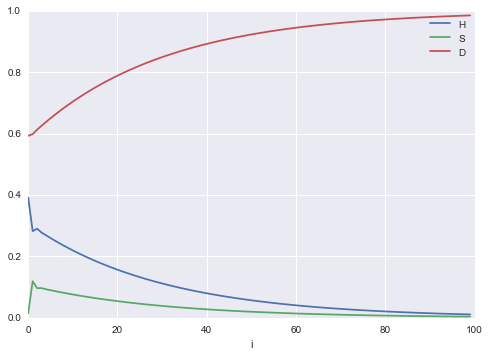

In [2]:
# Simple example for MARKOV CHAIN
# transition matrix
#T = np.array([[0.69, 0.3, 0.01],[ 0.8, 0.1, 0.1] ,[ 0,0.1 ,0.9]])
T = np.array([[0.69, 0.3, 0.01],[ 0.8, 0.1, 0.1] ,[ 0 , 0 ,1]])


# initial state USE RANDOM NUMBERS
p = np.random.uniform(low=0,high=1, size=3)
p = p/np.sum(p)

q=np.zeros((100,3))
for i in np.arange(0,100):
    q[i, :] = np.dot(p,np.linalg.matrix_power(T,i))

plt.plot(q)
plt.xlabel('i')
plt.legend( ('H', 'S', 'D'))



This stability result plays a fundamental role in MCMC simulation. For any starting point, the chain will convergence to the
invariant distribution $p(x)$, as long as $T$ is a stochastic transition matrix that obeys the
following properties:

* Irreducibility. For any state of the Markov chain, there is a positive probability of visiting
all other states. 
*  Aperiodicity. The chain should not get trapped in cycles.
* Invariance. A  condition to ensure that a particular $p(x)$ is the desired
invariant distribution is the following reversibility (detailed balance) condition

$$p(x^{(i)}) \, T(x^{(i-1)} | x^{(i)}) = p( x^{(i-1)}) \, T(x^{(i)} | x^{(i-1)}) $$

and if we sum both sides over $x^{(i-1)}$, it produces 

\begin{equation} p(x^{(i)}) = \sum_{x^{(i-1)}}  p( x^{(i-1)}) \, T(x^{(i)} | x^{(i-1)}) 
\end{equation}

because $\sum_{x^{(i-1)}} T(x^{(i-1)} | x^{(i)}) = 1 $




### Hint: Transition matrix properties, the good and the bad
If a matrix has at least one eigenvalue of -1 
then the solution as t→∞, oscillates. 
To construct a matrix that has certain eigenvalues 
we can use M=R∗D∗R−1 where R is an invertible matrix
and D is a diagonal square matrix with its diagonal 
values equal to the eignevalues. 

### Example
The concepts of irreducibility, aperiodicity and invariance can be better realized 
when we search for information on the web. 

Google computes a value called PageRank for each entry in its search engine. PageRank essentially measures how important or valuable a particular website/webpage is. PageRank is part of what determines which web page is displayed in which rank when you hit the __Search__ button. For some page ${\cal P}$, PageRank uses the number of pages that link to ${\cal P}$, as well as the number of pages that ${\cal P}$ links to compute the metric.
For some page  ${\cal P}$, the PageRank is defined as

$$ PR( {\cal P}) = \sum_{{\cal V}} \frac{PR({\cal V})}{L({\cal V})} $$ 

PageRank  assumes that the user randomly surfs from page ${\cal V}$ to $\cal P$ and it depends only on the previous page visited and no other page. 
This hints at a Markov chain. Google is able to estimate the PageRank values using MCMC. After a certain number of iterations, the Markov chain converges to a stationary distribution of PR values that approximate the probability that a user would randomly surf to some page $\cal P$. 


## MCMC

We have discussed Monte Carlo sampling and Markov chains. Monte Carlo sampling 
is design to  estimate various characteristics of a distribution such as the mean, variance, kurtosis, or any other statistic. 
Markov chains involve a stochastic sequential process where we can
sample states from some stationary distribution.
The goal of MCMC is to design a Markov chain such that the stationary distribution of
the chain is exactly the distribution that we are interesting in sampling from. This is called
the __target distribution__. 
In other words, the states sampled from the Markov
chain should follow the same statistics of samples drawn from the target distribution. The idea is to use some clever
methods for setting up the proposal distribution such that no matter how we initialize each
chain, we will convergence to the target distribution. 

## The Metropolis-Hastings algorithm

$$\newcommand{\var}{{\rm var}}
\newcommand{\cov}{{\rm cov}}
\newcommand{\corr}{{\rm corr}}
\newcommand{\xss}{x^{(i+1)}}
\newcommand{\xs}{x^{\star}}
\newcommand{\xt}{x^{(i)}}
\newcommand{\xa}{x_a}
\newcommand{\xb}{x_b}$$

The Metropolis-Hastings (MH) algorithm is the most popular of the MCMC 
methods (Metropolis et al 1953, Hastings 1970). As a matter of fact 
we will see that most MCMC algorithms can be interpreted as special cases
of this algorithm. 

Suppose our goal is to sample from the target density $p(x)$, with $-\infty< x < \infty$ . The
Metropolis-Hastings sampler creates a Markov chain that produces a sequence of values:
$$ x^{(1)} \rightarrow  x^{(2)}  \rightarrow \ldots  \rightarrow  x^{(t)} \ldots $$
where $x^{(t)}$ 
represents the state of a Markov chain at iteration $t$. The samples from the
chain, after burnin, reflect samples from the target distribution $p(x)$.

The MH algorithm, initializes the first state, $x^{(1)}$ 
to some initial value, and then uses a proposal distribution $q(\xs|\xt)$ to sample a candidate
value $\xs$ given the current value of $\xt$ according to $q(\xs|\xt)$. The Markov chain 
then moves towards $\xs$ with the acceptance probability 

$$
A(\xt,\xs) = \min\left[1, \frac{p(\xs) \, q(\xt|\xs)}{p(\xt) q(\xs|\xt) } \right] 
$$

otherwise it remains at $\xt$. 


* Initialize $x^{(1)}$ 
* For i=2 to N 

   * Sample $u\sim U(0,1)$ 
   *  Sample $\xs \sim q(\xs|x^{(i)})$ 
   *  if $u<A(x^{(i)},\xs) = \min\left[1, \frac{p(\xs) \, q(x^{(i)}|\xs)}{p(x^{(i)}) q(\xs| \xt ) } \right]  $
   
   $x^{(i+1)}=\xs$
   * else  
		$x^{(i+1)}=x^{(i)}$



Note that if the transition probability is symmetric $q(\xs|x^{(i)}) = q(x^{(i)}|\xs)$ then
the acceptance probability becomes 

$$ A(x,\xs) = \min\left[1, \frac{p(\xs)}{p(x) } \right] $$
which was the original algorithm proposed by Metropolis, thus the Metropolis algorithm.

A major advantage of the MH sampler is that the equation above involves only a ratio of
densities. Therefore, any terms independent of $x$ in the functional form of $p(x)$ will drop out.
Therefore, we do not need to know the normalizing constant of the density or probability. 
The fact that this procedure allows us to sample from unnormalized distributions is
one of its major attractions. Sampling from unnormalized distributions frequently happens
in Bayesian models, where calculating the normalization constant is difficult or impractical.


The MH algorithm is very simple, but it requires careful design of the proposal distribution 
$q(\xs| x)$. In subsequent lectures, we will see that many MCMC algorithms arise by
considering specific choices of this distribution.  
A way to design these sampling mechanism is to ensure that detailed
balance is satisfied. However, it is also important to design samplers that converge quickly
or the burnin time is short. 
Indeed, most of the effort will be dedicated to increasing the convergence speed.

## Examples
### Example1
In this example we sample from $p(x) =6x(1-x)$ using the Metropolis algorithm with proposal 
distribution 

$$\xs \sim N(x, 0.6) $$

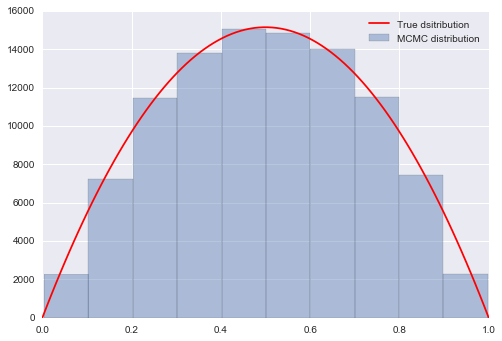

In [3]:

## FUNCTIONS 
# target distribution p(x) 
p = lambda x: 6*x*(1-x)

# number of samples
n = 100000

sig =0.10


#intitialize the sampling. Start somewhere from 0..1
x0 = np.random.uniform()


x_prev = x0

x=[]
k=1
i=0
while i<n:
    
    x_star = np.random.normal(x_prev, sig)
    while  (x_star <0) | (x_star > 1):  # MAKE SURE WE STAY WITHIN BOUNDS
        x_star = np.random.normal(x_prev, sig)
    
    
    
    P_star = 6*x_star*(1-x_star) #p(x_star);
    P_prev = 6*x_prev*(1-x_prev) #p(x_prev);
    U =  np.random.uniform()
    
    A =  P_star/P_prev
    if U < A:
        x.append(x_star)
        i = i + 1
        x_prev = x_star
    else :
        x.append(x_prev)
        x_prev = x[i]  
        i = i + 1
 
        k=k+1



e,q,h=plt.hist(x,10, alpha=0.4, label=u'MCMC distribution') 



xx= np.linspace(0,1,100)
plt.plot(xx, 0.67*np.max(e)*p(xx), 'r', label=u'True dsitribution') 
plt.legend()


### The normal distribution
In this example we sample from normal distribution (assuming we do not know how to do this) using the Metropolis algorithm with a proposal 
distribution 

$$\xs \sim U( x-\delta, x+\delta) $$
where $\delta=0.5$ is the random walk step. 

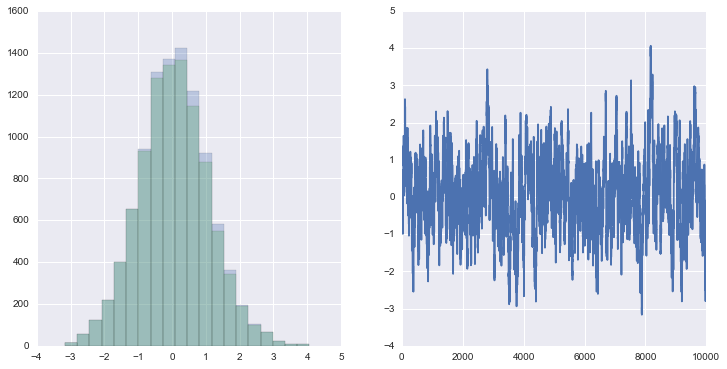

In [4]:
plt.figure(figsize=[12,6])

from scipy.stats import norm
# the target distribution
p = lambda x: norm.pdf(x)

delta = .5
# proposal distribution rule (random -delta .. delta) 
q = lambda x: x + np.random.uniform()*2*delta - delta;  

# number of samples
n = 10000


# start somewhere from 0..1
x0 = np.random.uniform()
x=np.zeros(n)

x_prev = x0

k=1
i=1
while i<n:
    
    x_star = q(x_prev)
   
    
    P_star = p(x_star)
    P_prev = p(x_prev)
    U = np.random.uniform()
    
    

    A = np.min((1, P_star/P_prev))
   
    if U <= A:
        x[i] = x_star
        i = i + 1
        x_prev = x_star
    else:
        x[i] = x_prev
        x_prev = x[i]  
        i = i + 1
        k=k+1



# =======
# PLOTTING
plt.subplot(1,2,1)
fig = plt.hist(x, 20, alpha=0.3)
fig = plt.hist(x[300:], 20, alpha=0.3)

plt.subplot(1,2,2)
plt.plot(x)



The fact that asymmetric proposal distributions can be used allows the Metropolis-Hastings procedure to sample from target distributions that are defined on a limited range
(other than the uniform for which Metropolis sampler can be used). With bounded variables, care should be taken in constructing a suitable proposal distribution. Generally, a
good rule is to use a proposal distribution that has positive density on the same support as the
target distribution. For example, if the target distribution has support over $0 \le x  < \infty$, the
proposal distribution should have the same support.

## Why does MH work?
Starting from the ergodic theorem: If $X=(x^{(1)}, x^{(2)}, \ldots, \xt)$ is an irreducible, aperiodic,
recurrent Markov chain, then there is a unique probability $\pi$ such as 
$i\rightarrow \infty$ 

$$ p(\xt \in A) \rightarrow \pi(A)  $$

for any $A$ where $\pi(x)$ is the stationary distribution of the Markov chain.
It is not hard to generate aperiodic, irreducible and recurrent Markov chains. 
To prove that the Markov chain is recurrent or having a stationary 
distribution follows from above.


What we need to prove is that the stationary distribution 
is the target distribution. 

For simplicity assume $X$ is discrete.	
Say $\xt$ is sampled from the target distribution $p(x)$ and if $\xss$ is generated from $\xt$ using MH, then if we can prove that  $p(\xss)=p(x)$ we know that the stationary distribution is the target distribution.


Let $\xa$ and $\xb$ be any two values of $X$ such that: 
$ p(x_a)  \, q(x_b \vert x_a) >=  p(x_b)  q(x_a \vert x_b)  $,
then under the MH algorithm the probability that 

$$ \xt = \xa  \hspace{0.3cm} {\rm and} \,\,\,  \xss = \xb $$

is equal to the probability of 

* sampling $\xt=\xa$ from $p(x)$
* proposing $\xs=\xb$ from $q(\xs | \xt) $
* accepting $\xss=\xb$

The probability of these three things to happen is the product of probabilities 

$$p(\xt = \xa, \xss = \xb)=p(\xa) \times q(\xb|\xa) \times \frac{p(\xb) \, q(\xa|\xb)}{p(\xa) \,q(\xb|\xa)} =p(\xb) \, q(\xa|\xb) $$
 
 On the other hand the probability that $\xt =\xb$ and $\xss = \xa$ is the probability that $\xb$ is sampled from $p$, $\xa$ is proposed from $q(\xs|\xt))$ and $\xa$ is accepted as 
 $\xss$. But remember we assumed	
 
 $$ p(\xa)  \, q(\xa|\xb) \ge  p(\xb) \, q(\xb|\xa)  $$
 
 which means the acceptance probability is 1 and therefore
 
 $$p(\xt = \xb, \xss = \xa) = p(\xb) \, q(\xa|\xb)  $$
  
  $$  \Rightarrow p(\xt = \xb, \xss = \xa) =p(\xt = \xa, \xss = \xb)  $$
Now lets consider the marginalized probability 

$$p(\xss =x) = \sum_{\xa} p(\xss = x, \xt = \xa) =\sum_{\xa} p(\xss = \xa, \xt = x) = p(\xt = x) $$

Which means that $p(\xss=x) = p(x)$ if $p(\xt=x) = p(x)$.


__Alternative proof:__
Consider a large number of `walkers' starting from different initial points
and moving independently of each other. Let $N_n(X)$ be the number
of walkers at $X$ after $n$ steps, then the net number of walkers moving 
from point $X$ to a new point $Y$ is
$$ \Delta N_n(X) =  N_n(X) P(X\rightarrow Y) - N_n(Y)  P(Y \rightarrow X) $$
$$ =   N_n(Y)P(X\rightarrow Y) \left[ \frac{N_n(X)}{N_n(Y)}  -\frac{P(Y\rightarrow X) }{P(X\rightarrow Y)} \right] $$
where $P(X\rightarrow Y)$ is the probability that a walker at $X$ will move
to $Y$. When 

$$ \frac{N_c(X)}{N_c(Y)}  =\frac{N_n(X)}{N_n(Y)} = \frac{P(Y\rightarrow X) }{P(X\rightarrow Y)} $$
then the number of walkers at point $X$ remains constant and therefore
the system is at steady state or the system is at the invariant distribution. 

The probability that a walker at $X$ will move to $Y$ is equal to the probability 
of proposing the point $Y$ being at point $X$, times the probability of accepting 
that proposed new position

$$P(X\rightarrow Y)  = q(Y|X) \, A(X,Y) $$

Lets assume the transition probability is symmetric, therefore

$$\frac{N_c(X)}{N_c(Y)}  = \frac{A(Y,X)}{A(X,Y)} $$

If $p(X) < p(Y)$ then we accept $Y$ with probability one, $A(Y,X)=1$, 
and $A(X,Y) = p(Y)/p(X) $. On the other hand if $p(X) > p(Y)$ then we accept $X$ with probability one, $A(X,Y)=1$ 
and $A(Y,X) = p(X)/p(Y)$. In conclusion 

$$\frac{N_c(X)}{N_c(Y)} = \frac{p(X)}{p(Y)} $$

in both cases,  which means the probability density of
any point $X$ is the same as the target pdf. 

## Metropolis-Hastings for Multivariate Distributions
Up to this point, we  discussed univariate distributions. It is easy
though to generalize the MH sampler to multivariate distributions. There are
two different ways to extend the procedure to sample random variables in multidimensional
spaces.

## Blockwise updating
Blockwise updating, uses a proposal distribution that has
the same dimensionality as the target distribution. 
If the probability distribution involves $N$ variables, we design a N-dimensional proposal
distribution, and we either accept or reject the proposal (involving values for all N variables)
as a block. In the following, we will use the vector notation ${\bf x} = (x_1, x_2,\ldots, x_N)$ to represent
a random variable involving N components, and $\xt$ to represents the i-th
state in our sampler.  We then simply replace the scalar $x$ with ${\bf x}$ in the MH sampler. 
In summary 


* Set i=1
* Generate ${\bf u} = (u_1, u_2, \ldots, u_N)$ and set ${\bf x^{(1)}}  = {\bf u}$
* Repeat 

	1. Propose ${\bf \xs}$ from $q({\bf \xss}|{\bf \xt)}$
	2. Evaluate acceptance probability $A = \min \left( 1, \frac{p({\bf \xs})}{p({\bf \xt})} \frac{q({\bf \xt}| {\bf \xs})}{q({\bf \xs}| {\bf  \xt})} \right)$
	3. Generate $u \sim U(0,1)$ 
	4. if $u\le A$ accept then ${\bf \xss} = {\bf \xs}$ else  ${\bf \xss} = {\bf \xt}$

## Componentwise updating
A problem with the blockwise updating approach is that it might be difficult to
find suitable high-dimensional proposal distributions. A related problem is that blockwise
updating can be associated with high rejection rates. Instead of accepting or rejecting a
proposal for $x$ involving all its components simultaneously, it might be computationally
simpler to make proposals for individual components of $x$, one at a time. This leads to a
componentwise updating approach.

Suppose we have a bivariate distribution, ${\bf x} = (x_1, x_2)$. First we initialize
the chain with some values $x_1^{(1)}$ and  $x_2^{(1)}$. We then update the 
chain one component at a time. We propose a $\xs_1$ and evaluate the acceptance
probability depending on $\xt_i$ and then evaluate the ratio of 
acceptance probabilities of $(\xs_1, \xt_2)$ and $(\xt_1, \xt_2)$.  In the next
step, we make a proposal for $\xs_2$ depending on the $\xt_2$ and 
compare the ratio of $(\xss_1, \xs_2)$ and $(\xss_1, \xt_2)$. In this step, we hold the 
first component constant. Therefore, the second step is conditional on what happens from
the first step. In summary: 

* Set i=1
* Generate ${\bf u} = (u_1, u_2, \ldots, u_N)$ and set ${\bf x^{(1)}}  = {\bf u}$
* Repeat 

	1. Propose $\xs_1$ from $q(\xss_1|\xt_1)$
	2. Evaluate acceptance probability $A = \min \left( 1, \frac{p(\xs_1, \xt_2)}{p(\xt_1, \xt_2)} \frac{ q(\xt_1| \xs_1)}{q(\xs_1| \xt_1)} \right)$
	3. Generate $u \sim U(0,1)$ 
	4. if $u\le A$ accept then $\xss_1 = \xs_1$ else  $\xss_1 = \xt_1$
	5. Propose $\xs_2$ from $q(\xss_2|\xt_2)$
	6.  Evaluate acceptance probability $A = \min \left( 1, \frac{p(\xss_1, \xs_2)}{p(\xss_1, \xt_2)}
		 \frac{q(\xt_2| \xs_2)}{q(\xs_2| \xt_2)} \right)$
	7. Generate $u \sim U(0,1)$ 
	8. if $u\le A$ accept then $\xss_2 = \xs_2$ else  $\xss_2 = \xt_2$

### Example
Suppose we want to sample from the bivariate normal distribution

In [5]:
xmin =-2; xmax = 2
ymin =-2; ymax = 2

sig_x = 0.1
sig_y = 0.1

n = 90000
# FUNCTIONS
p= lambda x,y:  np.exp(-x**2/2.0) * np.exp(-y**2/2.)

## NOW LETS BUILD OUR MH
# start from a random position 
np.random.seed(seed=10)
x0=np.random.normal()
y0=np.random.normal()
x_prev =x0
y_prev =y0


x = np.zeros(n)
y = np.zeros(n)
i=0
while i<n:


    # take a random step ~N(0,1) - proposal first in X 
    x_star = np.random.normal(x_prev, sig_x)
    
    
    P_star = p(x_star,y_prev)
    P_prev = p(x_prev, y_prev)
    A =  P_star/P_prev   # Acceptance probability. Since q is symmetric I do Metropolis
    U = np.random.uniform();
    

    if (U < A):
        x[i] = x_star
        i = i + 1
        x_prev = x_star
    else: 
        x[i] = x_prev
        x_prev = x[i]
        i = i + 1
    
    i=i-1
    # now lets do the y step 
    y_star =  np.random.normal(y_prev, sig_y)
    
    P_star = p(x_prev,y_star)
    P_prev = p(x_prev, y_prev)
    A =  P_star/P_prev
    
    U = np.random.uniform()
     
    if U < A:
        y[i] = y_star
        i = i + 1
        y_prev = y_star
    else: 
        y[i] = y_prev
        y_prev = y[i];  
        i = i + 1


x_mean= np.mean(x)
y_mean= np.mean(y)
np.std(x)
np.std(y)

1.0046441376573731

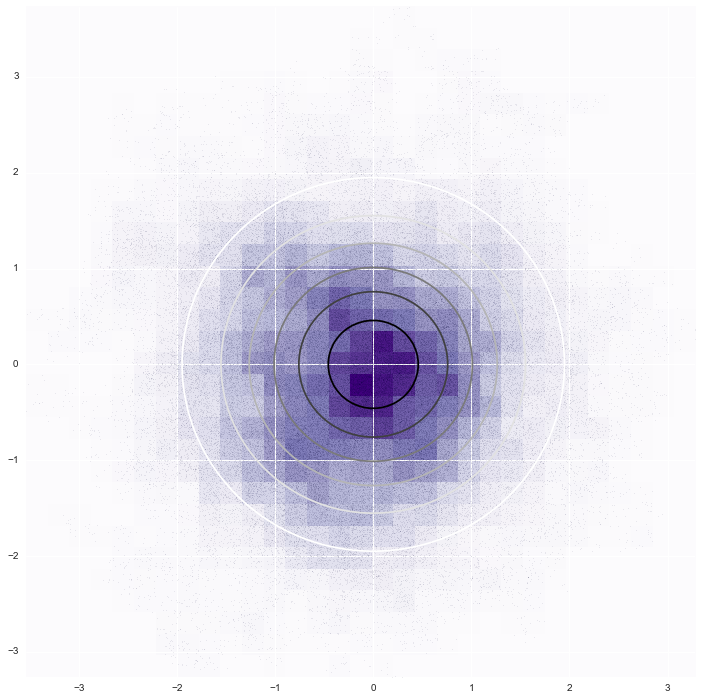

In [6]:
# PLOTTING
plt.figure(figsize=[12,12])
counts,xd,yd,fig=plt.hist2d(x,y,31, cmap="Purples");
#or try plt.hexbin(x,y, cmap="Purples")

xt,yt = np.meshgrid(np.linspace(-3,3, 100),np.linspace(-3,3,100))

plt.contour(xt,yt,  np.exp(-xt**2/2) * np.exp(-yt**2/2))

plt.scatter(x,y, 0.1, alpha=0.2, cmap="BuGn")

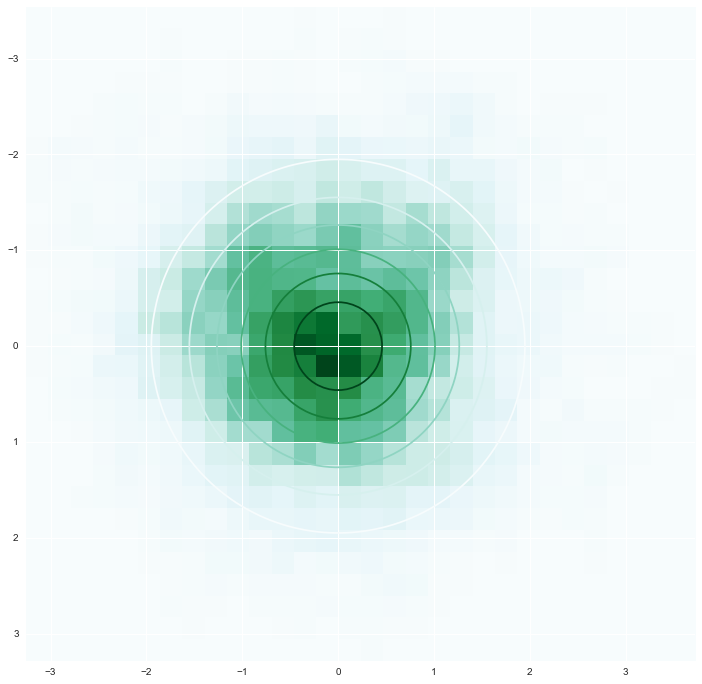

In [7]:
plt.figure(figsize=[12,12])
H, xedges, yedges = np.histogram2d(x, y, bins=(30,30))


extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

plt.imshow(H, extent=extent, interpolation='nearest', cmap="BuGn")
xt,yt = np.meshgrid(np.linspace(-3,3, 100),np.linspace(-3,3,100))
#plt.contour(xd[1:],yd[1:],counts, alpha=0.3)

plt.contour(xt,yt,  np.exp(-xt**2/2) * np.exp(-yt**2/2), cmap="BuGn")